# Solution to Assignment 1 - Vehicle stock in China

## Preparation: Packages and data imports

Start by importing the necessary packages:

In [1]:
#Importing necessary packages
#In this notebook, we will need pandas, numpy, and matplotlib.pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We also need to import the class DynamicStockModel from the package dynamic_stock_model
from dynamic_stock_model import DynamicStockModel

Then import the data into a Dataframe using the pandas read_excel function (check the documentation to find out which arguments to use) and clean it.

In [2]:
# Extracting data from the source file into a panda Dataframe
file = "Exercise_1_Data.xls"
# This file should be placed in the same directory as this notebook (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
data = pd.read_excel(file, sheet_name = 'CarStockData', usecols='D:P', skiprows=1)
# sheet_name, usecols and skiprows help us select the right data
data.drop(index=[0,1],inplace=True)
# We don't need to have the unit and dependency in the dataframe
data.reset_index(drop=True, inplace=True)
# We re-start the index counter to be at 0
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

In [3]:
data.head()

,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
0,1950,544951.0,1157.864047,0,0,0,0.0,27200.0,9.07,2.4,0,0,0
1,1951,555606.0,3085.651022,0,0,0,0.0,27200.0,9.07,2.4,0,0,0
2,1952,566261.0,1314.644583,0,0,0,0.0,27200.0,9.07,2.4,0,0,0
3,1953,576916.0,4843.545514,0,0,0,0.0,27200.0,9.07,2.4,0,0,0
4,1954,587571.0,3575.745174,0,0,0,0.0,27200.0,9.07,2.4,0,0,0


Create two Dataframes from data:
 - historic_data with values up to 2008
 - future_data with values for 2009 and after


In [4]:
historic_data = data[data.Time < 2009]
future_data = data[data.Time >= 2009]

## Inflow-driven model

Calculate outflows, stock change and stock for historic data, using an inflow-driven model:

In [5]:
# We first define the paramters lifetime function that we are going to use
lifetime = 15
std_dev = 5

# We then create a DynamicStockModel

DSM =  DynamicStockModel(t=historic_data['Time'],
                         i=historic_data['Inflow'],
                         lt={'Type': 'Normal', 
                             'Mean': np.array([lifetime]),
                             'StdDev': np.array([std_dev]) 
                             }
                            )
# It is necessary to convert the lifetime and st_dev to arrays 
# in order to respect the specifications of the class

# We can perform a dimension check
print(DSM.dimension_check())                  

inflow = DSM.i

# Calculating the stock by cohort
DSM.compute_s_c_inflow_driven()
s_c = DSM.s_c

# Calculating the outflows by cohort
DSM.compute_o_c_from_s_c()
o_c = DSM.o_c

# Calculating the total stock
stock   = DSM.compute_stock_total()

# Calculating the total outfloe
outflow = DSM.compute_outflow_total()

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 59 years.<br>Inflow vector is present with 59 years.<br>Total stock is not present.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15].<br>


In [6]:
# We can alo check the stock balance
print(DSM.check_stock_balance())  

0     0.000000e+00
1    -4.547474e-13
2     2.273737e-13
3     0.000000e+00
4    -9.094947e-13
5     0.000000e+00
6     2.728484e-12
7    -4.092726e-12
8     2.728484e-12
9    -9.094947e-13
10    8.299139e-12
11   -4.092726e-12
12    1.364242e-12
13   -5.456968e-12
14   -9.094947e-13
15    3.637979e-12
16    1.818989e-12
17   -1.045919e-11
18    1.546141e-11
19    1.364242e-12
20   -1.818989e-11
21    7.275958e-12
22    3.637979e-12
23   -7.275958e-12
24   -7.275958e-12
25    1.818989e-11
26    0.000000e+00
27   -3.637979e-12
28    2.182787e-11
29   -2.910383e-11
30    0.000000e+00
31   -3.637979e-11
32    2.910383e-11
33    2.182787e-11
34    0.000000e+00
35   -8.731149e-11
36   -5.820766e-11
37    2.328306e-10
38   -1.746230e-10
39    0.000000e+00
40    1.746230e-10
41   -2.037268e-10
42   -1.164153e-10
43    3.492460e-10
44    0.000000e+00
45   -5.820766e-10
46    9.313226e-10
47   -6.984919e-10
48    8.149073e-10
49   -5.820766e-10
50    9.313226e-10
51   -9.313226e-10
52    2.3283

In [7]:
# Add results to DataFrame
historic_data['Stock'] = DSM.s

## Stock-driven model

Calculate stock change, outflows and inflows for future data, using a stock-driven model. You need to run the stock-driven model for all years, combining historic stock data from the inflow-driven model, and future stock data from population and car ownership projections.

In [8]:
# Stock driven model for future scenario

# Creation of the stock vector 
# Input from future scenario for population and car ownership
future_data.Stock =  future_data['cars per 1000 people'] * future_data['Population']

# We combine historic and future stock data
data.Stock = pd.concat([historic_data['Stock'],future_data['Stock']])

# Creation of the new DSM, with time, stock and lifetime as inputs
DSMf = DynamicStockModel(t=data['Time'],
                         s=data['Stock'],
                         lt={'Type': 'Normal', 
                             'Mean': np.array([lifetime]),
                             'StdDev': np.array([std_dev]) 
                             }
                            )

print(DSMf.dimension_check())                  
#DSMf.dimension_check()     
DSMf.compute_stock_driven_model() 
DSMf.compute_outflow_total()
DSMf.compute_stock_total()
inflow_t = DSMf.i
outflow_t = DSMf.o
stock_tc = DSMf.s_c

# Checking mass balance
print(DSMf.check_stock_balance())  


<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 101 years.<br>Inflow is not present.<br>Total stock is present with 101 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15].<br>
[ 0.00000000e+00  0.00000000e+00 -2.27373675e-13  0.00000000e+00
 -9.09494702e-13  1.81898940e-12  9.09494702e-13 -5.00222086e-12
  3.63797881e-12 -2.72848411e-12  1.81898940e-12 -3.63797881e-12
  6.36646291e-12  1.81898940e-12 -8.18545232e-12 -1.81898940e-12
 -5.45696821e-12  2.00088834e-11 -1.09139364e-11 -3.18323146e-12
 -1.81898940e-12  5.45696821e-

## Final calculations

Perform the calculations for distance driven, fuel consumption and CO2 emissions

In [9]:
# The number of kilometers driven by car is a function of time: 
# the order in the multiplication matters!
total_km_driven_tc = np.dot(np.diag(data['Kilometrage per vehicle']), stock_tc);
total_km_driven_t  = np.sum(total_km_driven_tc, axis=1);

# The fuel efficiency is given in L/100 km, it is then necessary to divide by 100
# and further divide by 10^6 to get the results in ML
# The fuel efficiency is a function of the cohort and not time
total_gasoline_t  = np.dot(total_km_driven_tc, data['Fuel efficiency'] / 10**8);
# It is further necessary to divide by 1000 to get the results in Mt CO2
total_CO2_t       = total_gasoline_t * data['Carbon intensity'] / 1000;

## Plot the results

Plot the results of the model for inflows and outflows, stock change, stock, total distance driven, total fuel consumption, and total CO2 emissions

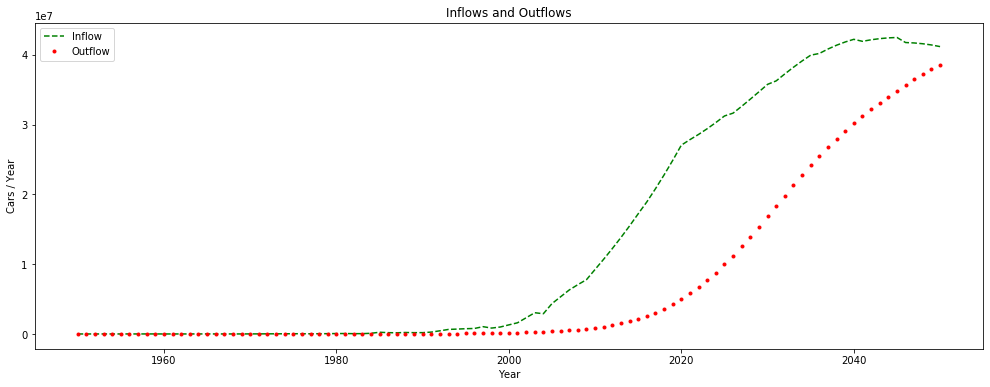

In [10]:
# Inflows and Outflows
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, DSMf.i, 'g--', label='Inflow')
plt.plot(DSMf.t, DSMf.o, 'r.', label='Outflow')
plt.title('Inflows and Outflows')
plt.xlabel('Year')
plt.ylabel('Cars / Year')
plt.legend(loc='best')
plt.savefig('Results/in_outflows_total')

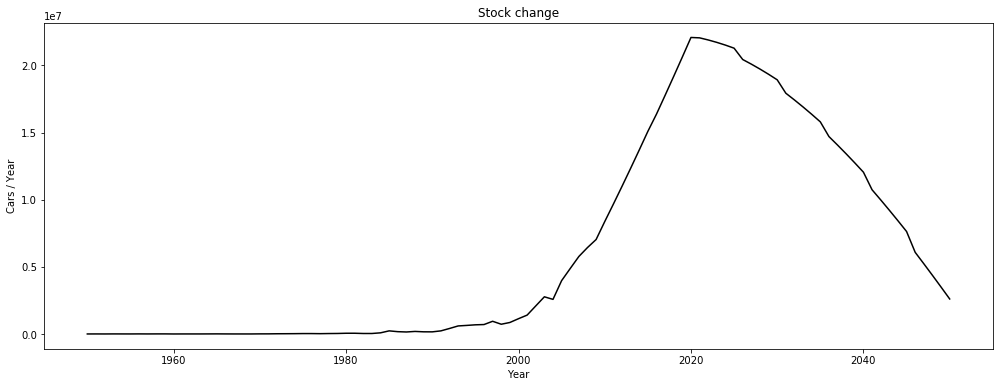

In [11]:
# Stock change
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, DSMf.i - DSMf.o, 'black')
plt.title('Stock change')
plt.xlabel('Year')
plt.ylabel('Cars / Year')
plt.savefig('Results/ds_only_total')

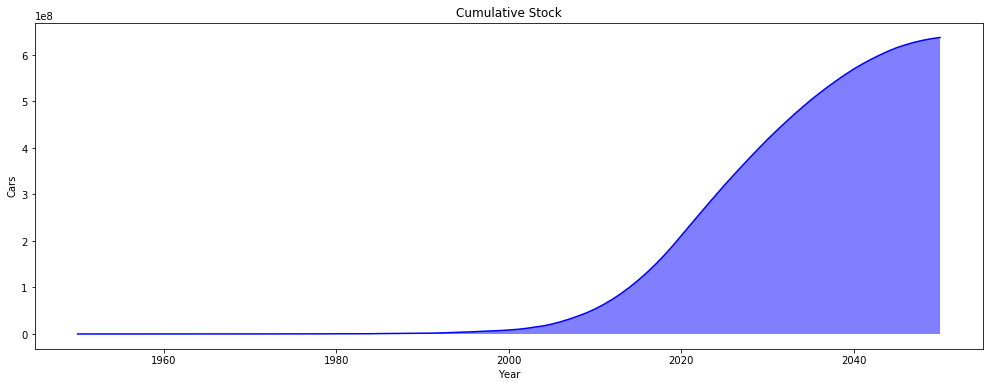

In [12]:
# Total Stock
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, DSMf.s, 'blue')
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('Cars')
plt.fill_between(DSMf.t, DSMf.s, facecolor='blue', alpha=0.5)
plt.savefig('Results/stock_total')

Text(0, 0.5, 'km / Year')

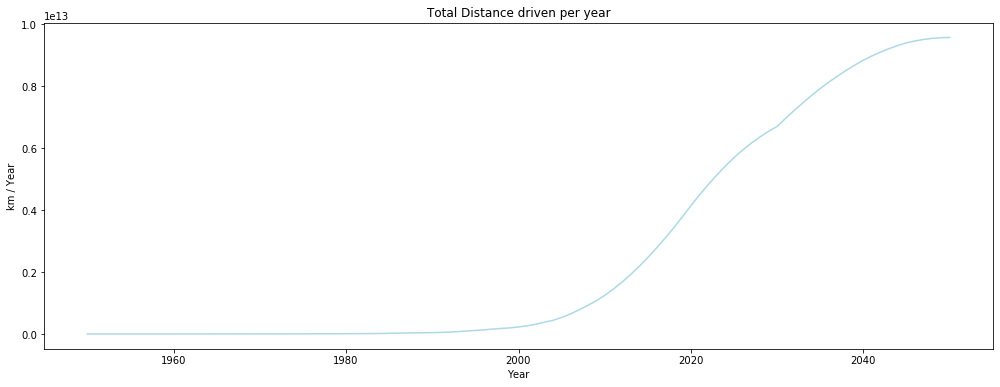

In [13]:
# Total Distance driven
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, total_km_driven_t, 'lightblue')
plt.title('Total Distance driven per year')
plt.xlabel('Year')
plt.ylabel('km / Year')

Text(0, 0.5, 'ML / Year')

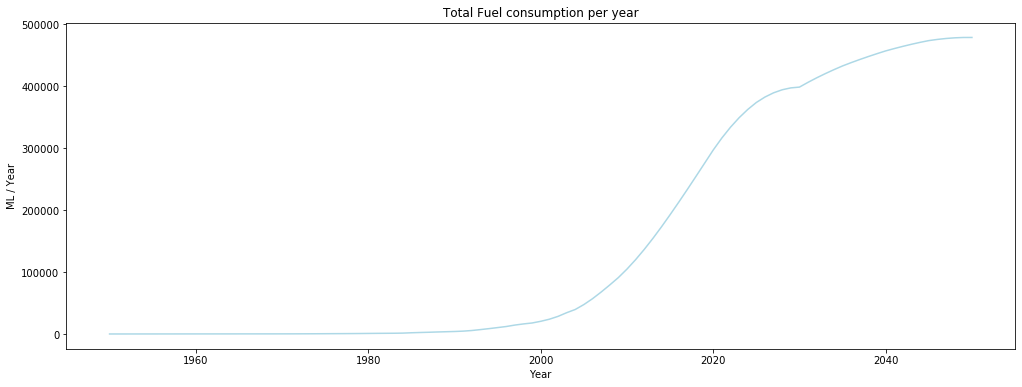

In [14]:
# TotalFuel consumption
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, total_gasoline_t, 'lightblue')
plt.title('Total Fuel consumption per year')
plt.xlabel('Year')
plt.ylabel('ML / Year')

Text(0, 0.5, 'Mt CO2 / Year')

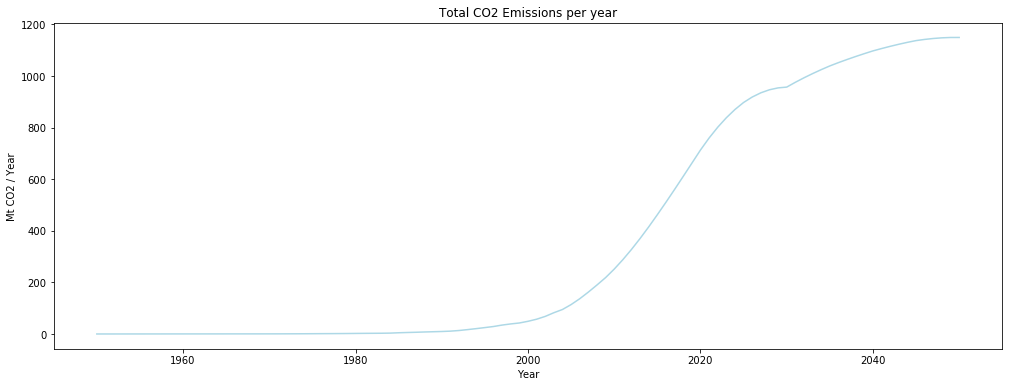

In [15]:
# Total CO2 Emissions
plt.figure(figsize=(17, 6))
plt.plot(DSMf.t, total_CO2_t, 'lightblue')
plt.title('Total CO2 Emissions per year')
plt.xlabel('Year')
plt.ylabel('Mt CO2 / Year')

We can also plot the results in a single figure, and export it:

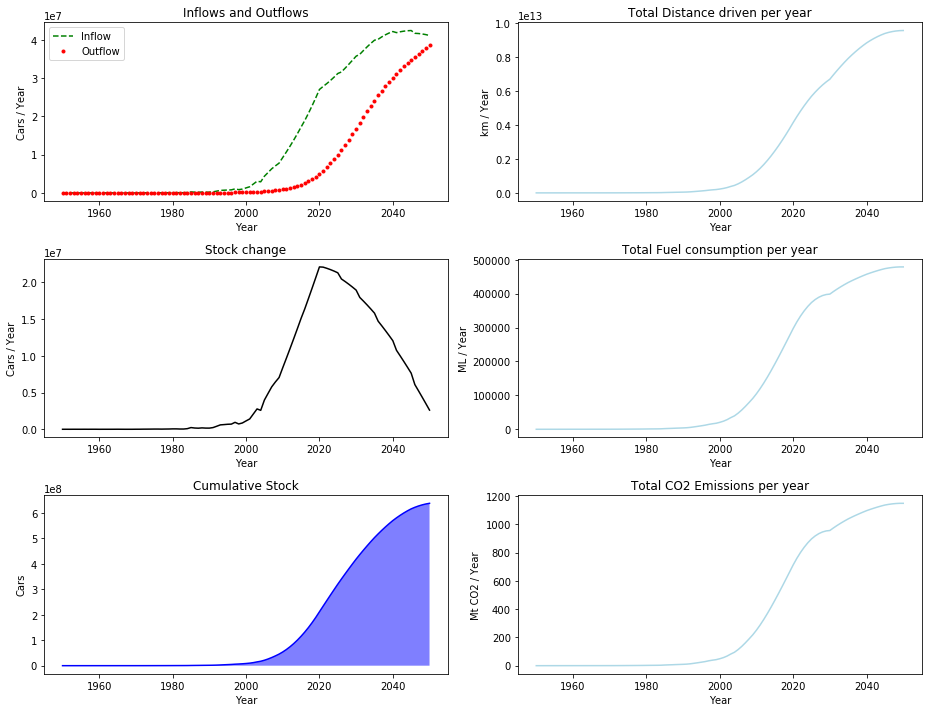

In [16]:
# Plotting the results
fig = plt.figure(figsize=(13, 10))

# Inflows and Outflows
ax1 = fig.add_subplot(321)
ax1.plot(DSMf.t, DSMf.i, 'g--', label='Inflow')
ax1.plot(DSMf.t, DSMf.o, 'r.', label='Outflow')
ax1.set(title='Inflows and Outflows',
        xlabel='Year',
        ylabel='Cars / Year')
ax1.legend(loc='best')

# Stock change
plt.subplot(323)
plt.plot(DSMf.t, DSMf.i - DSMf.o, 'black')
plt.title('Stock change')
plt.xlabel('Year')
plt.ylabel('Cars / Year')

# Total Stock
ax = plt.subplot(325)
plt.plot(DSMf.t, DSMf.s, 'blue')
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('Cars')
ax.fill_between(DSMf.t, DSMf.s, facecolor='blue', alpha=0.5)

# Total Distance driven
plt.subplot(322)
plt.plot(DSMf.t, total_km_driven_t, 'lightblue')
plt.title('Total Distance driven per year')
plt.xlabel('Year')
plt.ylabel('km / Year')

# TotalFuel consumption
plt.subplot(324)
plt.plot(DSMf.t, total_gasoline_t, 'lightblue')
plt.title('Total Fuel consumption per year')
plt.xlabel('Year')
plt.ylabel('ML / Year')

# Total CO2 Emissions
plt.subplot(326)
plt.plot(DSMf.t, total_CO2_t, 'lightblue')
plt.title('Total CO2 Emissions per year')
plt.xlabel('Year')
plt.ylabel('Mt CO2 / Year')

# Exporting the plots
plt.tight_layout()
plt.savefig('results_python.png')
plt.show()

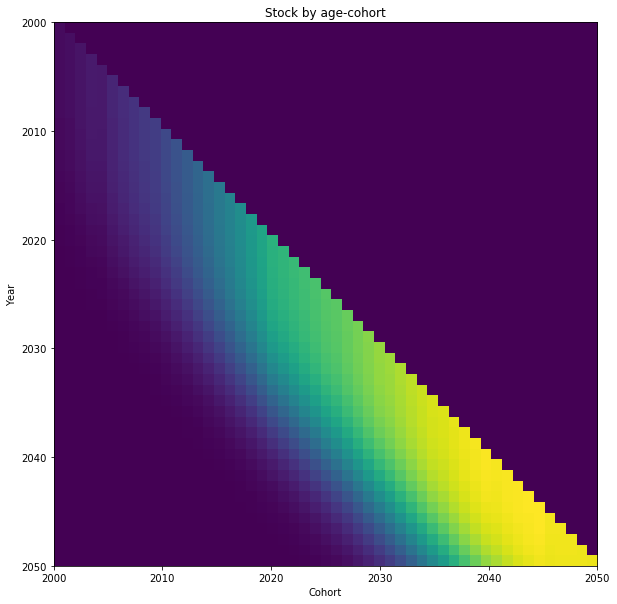

In [17]:
#Heat Map

plt.figure(figsize=(10, 10))
plt.imshow(DSMf.s_c[50:,50:], 
           extent=[DSMf.t[50], DSMf.t[len(DSMf.t)-1], DSMf.t[len(DSMf.t)-1], DSMf.t[50]],
           interpolation='nearest'
           #           ,cmap='nipy_spectral'
           )
plt.title('Stock by age-cohort')
plt.xlabel('Cohort')
plt.ylabel('Year')

plt.savefig('Heat map.png')
plt.show();

## Exports the results

Export the results back to the Excel file

In [18]:
data['Total km driven'] = total_km_driven_t
data['Total gasoline consumend'] = total_gasoline_t
data['Total direct CO2 emissions'] = total_CO2_t
data['Stock Change'] = DSMf.i - DSMf.o
data.Outflow = DSMf.o
data.Inflow = DSMf.i

In [20]:
data.to_excel('Results/results.xlsx')

In [19]:
data

,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
0,1950,544951.0,1.157864e+03,1.562998e+00,1.156301e+03,1.156301e+03,0.000000,27200.000000,9.070000,2.4,3.145139e+07,2.852641,0.006846
1,1951,555606.0,3.085651e+03,5.560809e+00,3.080090e+03,4.236391e+03,0.000000,27200.000000,9.070000,2.4,1.152298e+08,10.451347,0.025083
2,1952,566261.0,1.314645e+03,7.932091e+00,1.306712e+03,5.543104e+03,0.000000,27200.000000,9.070000,2.4,1.507724e+08,13.675059,0.032820
3,1953,576916.0,4.843546e+03,1.871591e+01,4.824830e+03,1.036793e+04,0.000000,27200.000000,9.070000,2.4,2.820078e+08,25.578106,0.061387
4,1954,587571.0,3.575745e+03,3.095181e+01,3.544793e+03,1.391273e+04,0.000000,27200.000000,9.070000,2.4,3.784262e+08,34.323253,0.082376
5,1955,598226.0,2.610542e+03,5.053311e+01,2.560009e+03,1.647274e+04,0.000000,27200.000000,9.070000,2.4,4.480584e+08,40.638899,0.097533
6,1956,607766.2,6.049388e+03,8.603145e+01,5.963357e+03,2.243609e+04,0.000000,27200.000000,9.070000,2.4,6.102617e+08,55.350738,0.132842
7,1957,617306.4,3.197066e+03,1.315339e+02,3.065532e+03,2.550162e+04,0.000000,27200.000000,9.070000,2.4,6.936442e+08,62.913528,0.150992
8,1958,626846.6,5.753977e+03,2.024503e+02,5.551527e+03,3.105315e+04,0.000000,27200.000000,9.070000,2.4,8.446457e+08,76.609367,0.183862
9,1959,636386.8,6.526579e+03,2.988701e+02,6.227709e+03,3.728086e+04,0.000000,27200.000000,9.070000,2.4,1.014039e+09,91.973373,0.220736
